In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [67]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns


In [68]:
df=pd.read_csv('/content/drive/MyDrive/train7.csv')
test=pd.read_csv('/content/drive/MyDrive/test7.csv')
df.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,y
0,300000,1,3,2,31,0,0,0,0,0,0,80928,82690,84462,86263,87238,89176,4000,4000,4100,3300,3500,3500,0
1,20000,1,2,2,24,0,0,0,0,0,0,15730,16776,35036,14694,16914,14074,1313,2110,4000,6000,4000,174,0
2,90000,2,2,2,35,-1,-1,-1,-2,-2,-2,2667,2667,0,0,0,0,2667,0,0,0,0,0,0
3,300000,2,2,1,40,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
4,70000,2,2,2,36,0,0,0,0,0,0,68028,67864,59165,29314,28844,29443,3340,2044,1773,1181,1215,1297,1


In [69]:
df.shape

(22500, 24)

In [70]:
df.isnull().sum().max() #no missing values

0

In [71]:
df.isna().sum()/df.shape[0]


X1     0.0
X2     0.0
X3     0.0
X4     0.0
X5     0.0
X6     0.0
X7     0.0
X8     0.0
X9     0.0
X10    0.0
X11    0.0
X12    0.0
X13    0.0
X14    0.0
X15    0.0
X16    0.0
X17    0.0
X18    0.0
X19    0.0
X20    0.0
X21    0.0
X22    0.0
X23    0.0
y      0.0
dtype: float64

In [72]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,y
count,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,2.250000e+04,22500.000000,22500.000000,22500.000000,22500.000000,2.250000e+04,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000
mean,167405.319111,1.606978,1.852400,1.550044,35.502133,-0.017022,-0.134133,-0.171022,-0.223200,-0.266933,-0.291156,50830.517644,48830.384089,4.671418e+04,42928.125467,40110.392978,38761.746267,5647.976578,5.969874e+03,5203.429733,4869.174178,4857.948889,5193.027644,0.222622
std,129534.293325,0.488433,0.792169,0.522087,9.231574,1.126169,1.195596,1.191513,1.168483,1.134080,1.154912,73227.018311,70848.675824,6.921239e+04,63924.102396,60492.541788,59073.782313,17015.575713,2.468042e+04,18036.973062,15990.912905,15808.695821,17551.318733,0.416016
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-6.150600e+04,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3480.750000,2953.250000,2.628750e+03,2291.000000,1729.500000,1261.000000,1000.000000,8.567500e+02,390.000000,284.000000,241.000000,137.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22196.000000,20987.000000,2.003500e+04,18971.500000,18038.500000,17100.500000,2100.000000,2.008500e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66511.000000,63072.750000,5.958825e+04,54049.000000,50211.000000,49326.250000,5005.000000,5.000000e+03,4500.000000,4000.000000,4034.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,527143.000000,1.000000


In [73]:
print('Credible', round(df['y'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print('Not credible', round(df['y'].value_counts()[0]/len(df) * 100,2), '% of the dataset')

Credible 22.26 % of the dataset
Not credible 77.74 % of the dataset


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions \n (0: Non Credible || 1: Credible)')

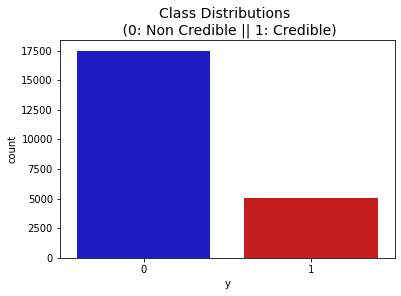

In [74]:
import seaborn as sns
colors = ["#0101DF", "#DF0101"]

sns.countplot('y', data=df, palette=colors)
plt.title('Class Distributions \n (0: Non Credible || 1: Credible)', fontsize=14)

In [123]:
count=0
print(y_train.head())
for i in y_train:
  if y_train[1]==0:
    count+=1
print('Non-credible :'+str(count))
print('Credible :'+str(22500-count))

17730    1
18784    0
16809    0
20793    0
13114    0
Name: y, dtype: int64
Non-credible :15750
Credible :6750


In [75]:
correlated_features = set()
correlation_matrix = df.corr()

In [76]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)


In [77]:
print(correlated_features)


{'X14', 'X13', 'X16', 'X11', 'X17', 'X15', 'X10'}


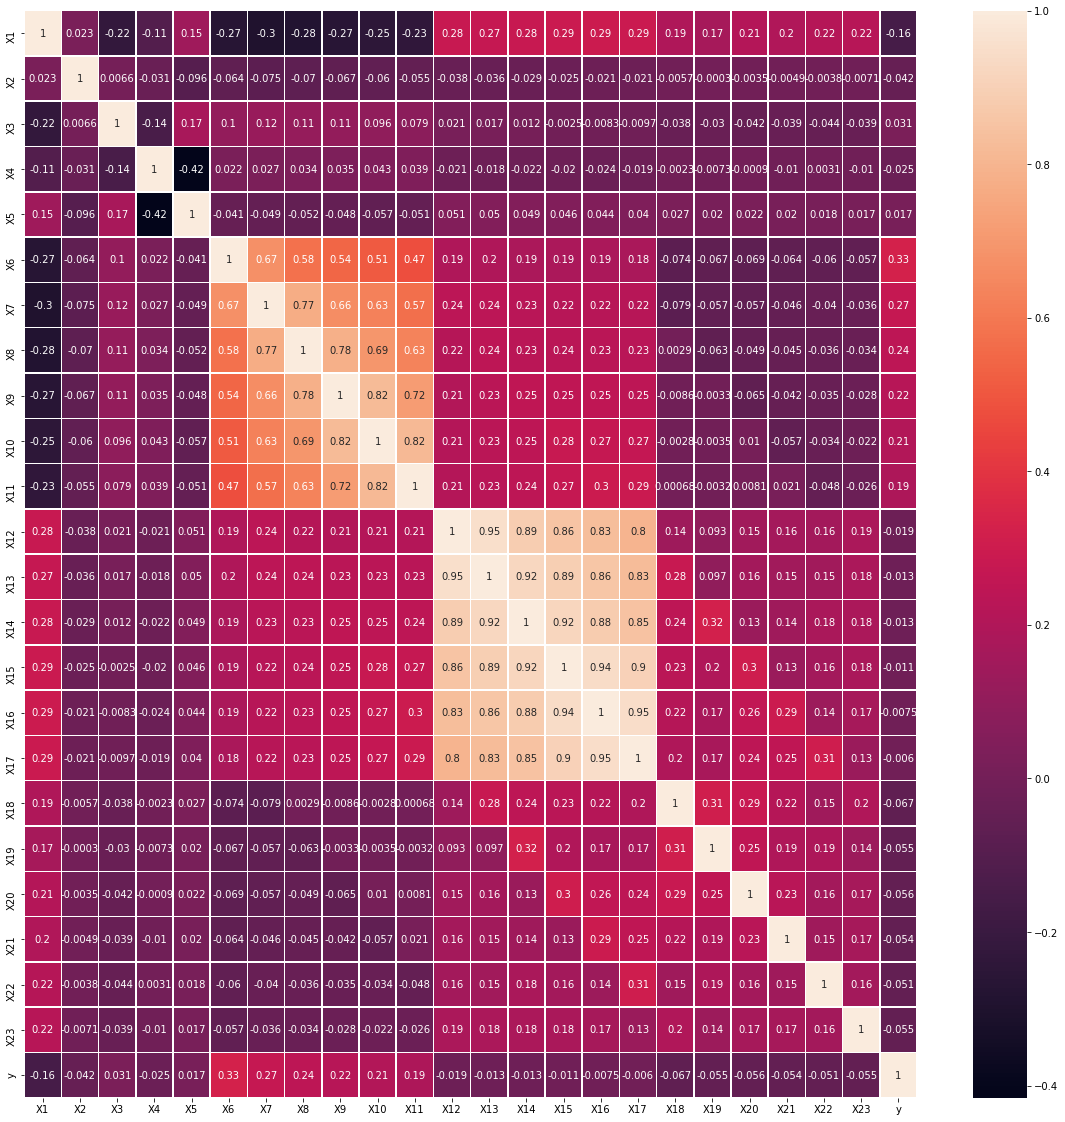

In [78]:
from matplotlib.pyplot import figure
#sns.heatmap(correlation_matrix, annot=True)
fig, ax = plt.subplots(figsize=(20,20))         
sns.heatmap(correlation_matrix, annot=True, linewidths=.5, ax=ax)

plt.show()

In [79]:
import scipy.stats as stats
tstats_df = pd.DataFrame()
for num_variable in df.columns.difference(['y']):
    tstats=stats.ttest_ind(df[df.y==1][num_variable],df[df.y==0][num_variable])
    temp = pd.DataFrame([num_variable, tstats[0], tstats[1]]).T
    temp.columns = ['Variable Name', 'T-Statistic', 'P-Value']
    tstats_df = pd.concat([tstats_df, temp], axis=0, ignore_index=True)
print(tstats_df)


   Variable Name T-Statistic       P-Value
0             X1    -23.5473  3.90507e-121
1            X10      31.793  5.06603e-217
2            X11     29.1964  5.78092e-184
3            X12    -2.82661    0.00470847
4            X13    -1.90721     0.0565058
5            X14    -1.99766     0.0457651
6            X15    -1.60825      0.107794
7            X16    -1.12821      0.259241
8            X17   -0.894537      0.371044
9            X18    -10.1072    5.7769e-24
10           X19     -8.3234   9.02821e-17
11            X2    -6.34937   2.20323e-10
12           X20    -8.38525   5.35543e-17
13           X21    -8.11454   5.12413e-16
14           X22    -7.72992   1.12107e-14
15           X23    -8.27306   1.37738e-16
16            X3     4.68189   2.85894e-06
17            X4    -3.75116   0.000176458
18            X5     2.47713     0.0132515
19            X6     52.1441             0
20            X7      42.051             0
21            X8     37.4803  2.77739e-298
22         

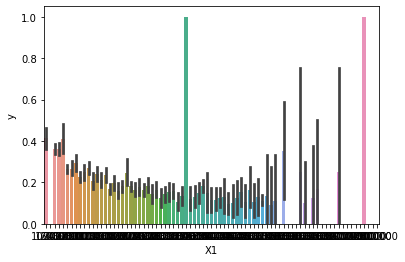

In [80]:
sns.barplot(x="X1", y="y", data=df);


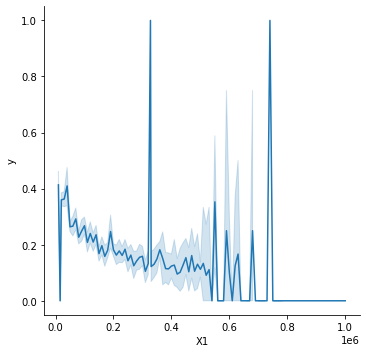

In [81]:
sns.relplot(x="X1", y="y",kind='line', data=df);


In [82]:
target=df['y']
features=df.copy()
print(target)
features.drop('y',axis=1,inplace=True)
print(features)

0        0
1        0
2        0
3        0
4        1
        ..
22495    0
22496    1
22497    0
22498    1
22499    1
Name: y, Length: 22500, dtype: int64
           X1  X2  X3  X4  X5  X6  ...    X18   X19   X20   X21    X22    X23
0      300000   1   3   2  31   0  ...   4000  4000  4100  3300   3500   3500
1       20000   1   2   2  24   0  ...   1313  2110  4000  6000   4000    174
2       90000   2   2   2  35  -1  ...   2667     0     0     0      0      0
3      300000   2   2   1  40   1  ...      0     0     0     0      0      0
4       70000   2   2   2  36   0  ...   3340  2044  1773  1181   1215   1297
...       ...  ..  ..  ..  ..  ..  ...    ...   ...   ...   ...    ...    ...
22495   50000   1   2   2  32   0  ...   2000  3000  1591    72   1134  73421
22496  200000   1   1   2  37   2  ...  13500  6000     0  7500   6000   4000
22497   50000   1   1   2  26  -2  ...      0     0     0     0      0      0
22498   70000   2   2   2  25   0  ...   3000  2000  4500  120

In [83]:
features.drop(columns=['X13', 'X14', 'X11', 'X16', 'X10', 'X15', 'X17'], axis=1, inplace=True)
#{'X13', 'X14', 'X11', 'X16', 'X10', 'X15', 'X17'}


In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [85]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train=pd.DataFrame(data=X_train)
X_test=pd.DataFrame(data=X_test)
'''
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(features)
features=pd.DataFrame(data=scaled)
features.head()
'''

'\nfrom sklearn.preprocessing import StandardScaler\n# define standard scaler\nscaler = StandardScaler()\n# transform data\nscaled = scaler.fit_transform(features)\nfeatures=pd.DataFrame(data=scaled)\nfeatures.head()\n'

In [86]:
features.shape

(22500, 16)

In [87]:
target.head()

0    0
1    0
2    0
3    0
4    1
Name: y, dtype: int64

In [88]:
print(features.head())

       X1  X2  X3  X4  X5  X6  X7  ...    X12   X18   X19   X20   X21   X22   X23
0  300000   1   3   2  31   0   0  ...  80928  4000  4000  4100  3300  3500  3500
1   20000   1   2   2  24   0   0  ...  15730  1313  2110  4000  6000  4000   174
2   90000   2   2   2  35  -1  -1  ...   2667  2667     0     0     0     0     0
3  300000   2   2   1  40   1  -2  ...      0     0     0     0     0     0     0
4   70000   2   2   2  36   0   0  ...  68028  3340  2044  1773  1181  1215  1297

[5 rows x 16 columns]


In [89]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
pred = lr.predict(X_test)

In [91]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, pred)))

Accuracy of logistic regression classifier on test set: 1.00


No Skill PR AUC: 0.304
Logistic PR AUC: 0.510


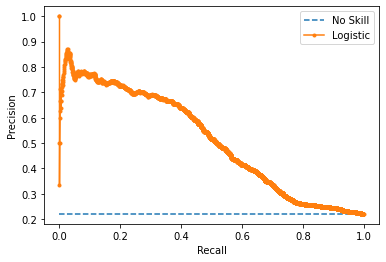

In [129]:
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot

# plot no skill and model precision-recall curves
def plot_pr_curve(test_y, model_probs):
	# calculate the no skill line as the proportion of the positive class
	no_skill = len(test_y[test_y==1]) / len(test_y)
	# plot the no skill precision-recall curve
	pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
	# plot model precision-recall curve
	precision, recall, _ = precision_recall_curve(y_test, model_probs)
	pyplot.plot(recall, precision, marker='.', label='Logistic')
	# axis labels
	pyplot.xlabel('Recall')
	pyplot.ylabel('Precision')
	# show the legend
	pyplot.legend()
	# show the plot
	pyplot.show()

# no skill model, stratified random class predictions
model = DummyClassifier(strategy='stratified')
model.fit(X_train, y_train)
yhat = model.predict_proba(X_test)
naive_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(y_test, naive_probs)
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)
# fit a model
model = LogisticRegression()
model.fit(X_train, y_train)
yhat = model.predict_proba(X_test)
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(y_test, model_probs)
auc_score = auc(recall, precision)
print('Logistic PR AUC: %.3f' % auc_score)
# plot precision-recall curves
plot_pr_curve(y_test, model_probs)

In [92]:
from sklearn.neighbors import KNeighborsClassifier
train_score = []
test_score = []
k_vals = []

for k in range(1, 21):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)
    
    te_score = knn.score(X_test, y_test)
    test_score.append(te_score)

In [93]:
## score that comes from the testing set only
max_test_score = max(test_score)
test_scores_ind = [i for i, v in enumerate(test_score) if v == max_test_score]
print('Max test score {} and k = {}'.format(max_test_score * 100, list(map(lambda x: x + 1, test_scores_ind))))

Max test score 81.4074074074074 and k = [20]


In [94]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(3)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7842962962962963

In [95]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)



Predicted,0,1,All
Actual,,,
0,4722,539,5261
1,917,572,1489
All,5639,1111,6750


In [96]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      5261
           1       0.51      0.38      0.44      1489

    accuracy                           0.78      6750
   macro avg       0.68      0.64      0.65      6750
weighted avg       0.77      0.78      0.77      6750



In [103]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, features, target, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.732 (0.012)


In [107]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
# define pipeline
steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_train, y_train, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.624


In [124]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# define pipeline
over = RandomOverSampler(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.6)
steps = [('o', over), ('u', under), ('m', knn)]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, features, target, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.659


In [101]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(16, input_dim=16, activation='relu'))
	model.add(Dense(10, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=10, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=20, shuffle=True)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 81.90% (1.01%)


In [102]:
print(results)

[0.8312183  0.81345177 0.81979698 0.82614213 0.81852794 0.81725889
 0.80837566 0.81598985 0.82868022 0.80837566 0.82210928 0.82973319
 0.79796696 0.82465059 0.841169   0.80813217 0.82465059 0.80432022
 0.82337993 0.81702667]


In [130]:
test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,30000,1,2,2,25,0,0,0,0,0,0,8864,10062,11581,12580,13716,14828,1500,2000,1500,1500,1500,2000
1,150000,2,1,2,26,0,0,0,0,0,0,136736,125651,116684,101581,77741,77264,4486,4235,3161,2647,2669,2669
2,70000,2,3,1,32,0,0,0,0,0,0,70122,69080,68530,69753,70111,70212,2431,3112,3000,2438,2500,2554
3,130000,1,3,2,49,0,0,0,0,0,-1,20678,18956,16172,16898,11236,6944,1610,1808,7014,27,7011,4408
4,50000,2,2,2,36,0,0,0,0,0,2,94228,47635,42361,19574,20295,19439,2000,1500,1000,1800,0,1000


In [133]:
test.drop(columns=['X13', 'X14', 'X11', 'X16', 'X10', 'X15', 'X17'], axis=1, inplace=True)
#{'X13', 'X14', 'X11', 'X16', 'X10', 'X15', 'X17'}


In [134]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
test = sc.fit_transform(X_test)
#X_train=pd.DataFrame(data=X_train)
test=pd.DataFrame(data=X_test)

In [135]:
prediction=knn.predict(test)

In [136]:
print(prediction)

[0 0 1 ... 0 1 0]


In [139]:
frames = [test,prediction]

predictions = pd.concat(frames)

In [140]:
import numpy as np
import pandas as pd
prediction = pd.DataFrame(predictions).to_csv('final_prediction.csv')